In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.colors as mcolors
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,              # Use TeX for text rendering
    "font.family": "serif",           # Use serif fonts
})

In [14]:
# pickle load file into dict
with open('../sentiment_paper_1_15.pkl', 'rb') as f:
    # load pickle file into dictionary p
    method_results = pickle.load(f)

In [15]:
method_results['methods'].keys()

dict_keys(['linear_1', 'linear_2', 'linear_3', 'linear_4', 'lasso_1', 'lasso_2', 'lasso_3', 'lasso_4', 'faith_shapley_1', 'faith_shapley_2', 'faith_shapley_3', 'faith_shapley_4', 'lime_0', 'qsft_hard_0', 'qsft_soft_0'])

In [16]:
method_dict = {'qsft_hard_0': 'SpectralExplain\nHard',
               'qsft_soft_0': 'SpectralExplain\nSoft',
               'lime_0': 'LIME',
               'lasso_1': 'Fourier LASSO\n1st Order',
               'lasso_2': 'Fourier LASSO\n2nd Order',
               'lasso_3': 'Fourier LASSO\n3rd Order',
               'lasso_4': 'Fourier LASSO\n4th Order',
               'linear_1': 'Fourier Regress\n1st Order',
               'linear_2': 'Fourier Regress\n2nd Order',
               'linear_3': 'Fourier Regress\n3rd Order',
               'linear_4': 'Fourier Regress\n4th Order',
               'faith_shapley_1': 'Faith-Shap\n1st Order',
               'faith_shapley_2': 'Faith-Shap\n2nd Order',
               'faith_shapley_3': 'Faith-Shap\n3rd Order',
               'faith_shapley_4': 'Faith-Shap\n4th Order',
               }
method_order = ['qsft_soft_0', 'qsft_hard_0', 'lime_0', 'linear_1', 'linear_2', 'linear_3', 'linear_4', 'lasso_1', 'lasso_2', 'lasso_3', 'lasso_4', 'faith_shapley_1',  'faith_shapley_2',  'faith_shapley_3',  'faith_shapley_4']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#D3D3D3', '#290133'])

groups = ['8-15', '16-31', '32-63', '64-127', '128-255', '256-511', '512-1023', '1024-2047']

In [17]:
# all b = 8, test_r2
results_mean = np.zeros((len(method_order), 8))
results_std = np.zeros((len(method_order), 8))
time_mean = np.zeros((len(method_order), 8))
time_std = np.zeros((len(method_order), 8))
for i, method in enumerate(method_order):
    for bundle in range(8):
        l = method_results['methods'][method]['test_r2'][20 * bundle : 20 * (bundle + 1), 0]
        results_mean[i, bundle] = np.mean(l)
        results_std[i, bundle] = np.std(l)
        m = method_results['methods'][method]['time'][20 * bundle : 20 * (bundle + 1), 0]
        time_mean[i, bundle] = np.mean(m)
        time_std[i, bundle] = np.std(m)

In [23]:
np.flip(results_mean_non_neg.T,1)

array([[0.13227817, 0.08792912, 0.16207637, 0.42112804, 0.99617979,
        0.98924519, 0.95825298, 0.83550028, 0.99745695, 0.98987797,
        0.95847677, 0.83554967, 0.81315374, 0.99608046, 0.99679367],
       [       nan, 0.01      , 0.01      , 0.01      ,        nan,
        0.97598238, 0.93304061, 0.7538088 ,        nan, 0.97734425,
        0.93378895, 0.75393142, 0.69777859, 0.96768211, 0.97495517],
       [       nan,        nan, 0.01      , 0.01      ,        nan,
               nan, 0.89829229, 0.67510676,        nan,        nan,
        0.89943358, 0.67540784, 0.59657355, 0.91782178, 0.93127686],
       [       nan,        nan, 0.01      , 0.01      ,        nan,
               nan, 0.87219063, 0.65420737,        nan,        nan,
        0.86226383, 0.65525468, 0.47346903, 0.85079007, 0.87113689],
       [       nan,        nan,        nan, 0.01      ,        nan,
               nan,        nan, 0.62854752,        nan,        nan,
               nan, 0.63204889, 0.01482827, 

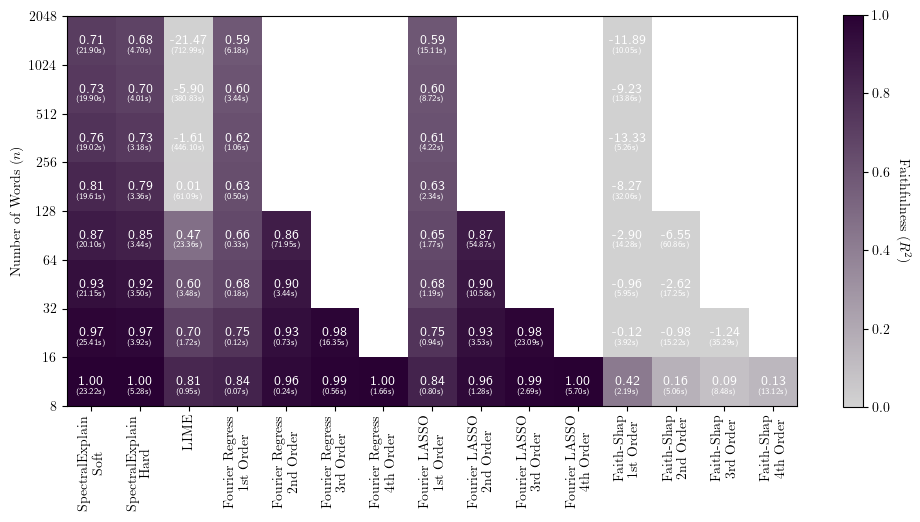

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))

results_mean_non_neg = results_mean.copy()
results_mean_non_neg[results_mean_non_neg < 0] = 0.01
im = ax.imshow(np.flip(results_mean_non_neg.T,0), cmap=cmap, vmin=0, vmax=1)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(groups)+1)- 0.5, labels=[2 ** i for i in range(3, 12)][::-1])
ax.set_xticks(range(len(method_order)), labels=[method_dict[m] for m in method_order], rotation=90)

# Loop over data dimensions and create text annotations.
for i in range(len(method_order)):
    for j in range(len(groups)):
        mean_val = results_mean[i, 7 - j]
        ax.text(i, j, rf"\textsf{{{mean_val:.2f}}}", ha="center", va="center", color="white", fontsize=10)

        time_val = time_mean[i, 7 - j]
        ax.text(i, j+0.2, rf"\textsf{{({time_val:.2f}s)}}", ha="center", va="center", color="white", fontsize=6)

cbar = fig.colorbar(im, ax=ax, shrink=0.51)
cbar.set_label(r"Faithfulness ($R^2$)", rotation=270, labelpad=15)
ax.set_ylabel(r'Number of Words ($n$)')
fig.tight_layout()
plt.savefig('Sentiment Faithfulness Heatmap.png', dpi=400, bbox_inches='tight')
plt.show()

1
2
4
7
10
13


<Figure size 640x480 with 0 Axes>

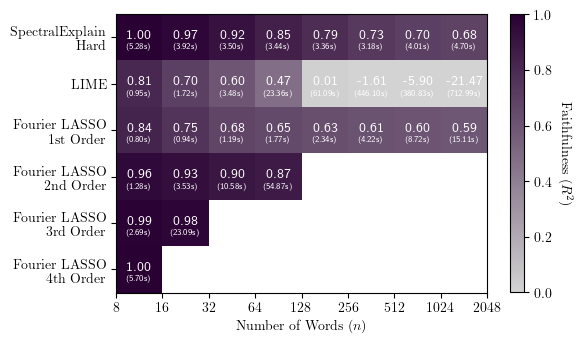

In [8]:
plt.clf()
restricted_methods = [1,2,7,8,9,10]
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(results_mean[restricted_methods], cmap=cmap, vmin=0, vmax=1)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(groups)+1)- 0.5, labels=[2 ** i for i in range(3, 12)],
              ha="center", rotation_mode="anchor")
ax.set_yticks(range(len([1,2,4,7,10,13])), labels=[method_dict[m] for i, m in enumerate(method_order) if i in restricted_methods])

# Loop over data dimensions and create text annotations.
for i in restricted_methods:
    print(i)

    for j in range(len(groups)):
        mean_val = results_mean[i, j]

        ax.text(j, restricted_methods.index(i) - 0.05, rf"\textsf{{{mean_val:.2f}}}", ha="center", va="center", color="white", fontsize=10)

        time_val = time_mean[i, j]
        ax.text(j, restricted_methods.index(i) + 0.2, rf"\textsf{{({time_val:.2f}s)}}", ha="center", va="center", color="white", fontsize=6)

cbar = fig.colorbar(im, ax=ax, shrink=0.488)
cbar.set_label(r"Faithfulness ($R^2$)", rotation=270, labelpad=15)
ax.set_xlabel(r'Number of Words ($n$)')
fig.tight_layout()
plt.savefig('Sentiment Faithfulness Heatmap Restricted.png', dpi=400, bbox_inches='tight')
plt.show()

In [53]:
im = ax.imshow(results_mean[restricted_methods], cmap=cmap, vmin=0, vmax=1)

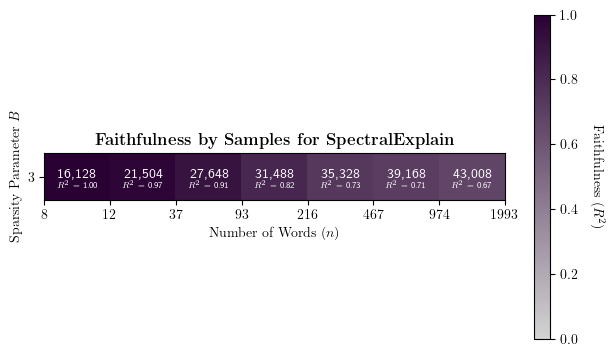

In [54]:
## Phase Diagram for SpectralExplain
sample_groupings = {}
for i, sample_seq in enumerate(method_results['samples']):
    ss = tuple(sample_seq)
    if tuple(ss) in sample_groupings:
        sample_groupings[ss].append(i)
    else:
        sample_groupings[ss] = [i]
    ss_len = len(ss)

sort_s = list(sample_groupings.keys())
sort_s.sort(key=lambda x: x[0])


sample_grouping_means = np.zeros((len(sample_groupings), ss_len))
for j, s in enumerate(sort_s):
    indices = sample_groupings[s]

    # Ensure this indexing works as expected with test_r2
    group_results = method_results['methods']['qsft_hard_0']['test_r2'][indices, :]
    sample_grouping_means[j,:] = group_results.mean(axis=0)[::-1]

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(sample_grouping_means.T, cmap=cmap, vmin=0, vmax=1, aspect=0.7)

n_word_limits = [8, 12, 37, 93, 216, 467, 974, 1993]
ax.set_xticks(np.arange(len(list(sample_groupings.keys()))+1)- 0.5, labels=n_word_limits,
              ha="center", rotation_mode="anchor", family=['serif'])
ax.set_yticks(range(ss_len), labels=list(range(ss_len+2,2,-1)), family='serif')

# Loop over data dimensions and create text annotations.
for i in range(len(sample_groupings)):
    for j in range(ss_len):
        r2 = sample_grouping_means[i][j]
        mean_val = sample_grouping_means[i, j]
        ax.text(i, j - 0.05, rf"\textsf{{{int(sort_s[i][ss_len - j - 1]):,}}}", ha="center", va="center", color="white" if r2 >= 0.3 else "black", fontsize=10, fontfamily='sans-serif')

        ax.text(i, j + 0.2, rf"\textsf{{$R^2$ = {mean_val:.2f}}}", ha="center", va="center", fontsize=6,
                fontfamily='sans-serif', color="white" if r2 >= 0.3 else "black")

# cmap = plt.colormaps.get_cmap("Blues")

ax.set_xlabel(r'Number of Words ($n$)')
ax.set_ylabel(r'Sparsity Parameter $B$')
ax.set_title(r'\textbf{Faithfulness by Samples for SpectralExplain}')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
cbar = plt.colorbar(sm, ax=ax, shrink=0.72)
# cbar = fig.colorbar(sc, ax=ax, orientation='vertical', cmap=cmap)
cbar.set_label(r'Faithfulness ($R^2$)', rotation=270, labelpad=20)

# Adjust layout for better spacing
fig.tight_layout()

# Save the plot
plt.savefig('Sentiment R^2 Samples.png', dpi=400, bbox_inches='tight')
plt.show()